# 🧠 Overfitting, Underfitting, and Fine-Tuning on Café Dataset

In this notebook, we will:
- Train a Linear Regression model
- Check for overfitting or underfitting
- Fine-tune with Polynomial Regression
- Visualize predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error


## 📥 Load and Prepare Data
We use:
- Features: Quantity, Price Per Unit
- Target: Total Spent

In [2]:
# Load your dataset
df = pd.read_csv("cafe_clustered_data.csv")

# Features and target
X = df[['Quantity', 'Price Per Unit']]
y = df['Total Spent']

# 80/20 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 📈 Train Base Linear Regression Model
We'll evaluate using R² Score and Mean Squared Error (MSE).


In [3]:
# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Linear Regression Results:")
print("📘 Train R²:", train_r2)
print("📕 Test R² :", test_r2)
print("📘 Train MSE:", train_mse)
print("📕 Test MSE :", test_mse)

# Overfit/Underfit Check
if train_r2 > 0.9 and test_r2 < 0.7:
    print("⚠️ Overfitting Detected")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("⚠️ Underfitting Detected")
else:
    print("✅ Model is well balanced")


Linear Regression Results:
📘 Train R²: 0.8537398044970739
📕 Test R² : 0.8517294779330224
📘 Train MSE: 5.268589883675078
📕 Test MSE : 5.440104669210803
✅ Model is well balanced


## 🛠 Fine-Tune with Polynomial Regression
This adds squared and interaction terms to capture curves.


In [4]:
# Pipeline for polynomial regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_poly_pred = poly_pipeline.predict(X_test)

# Evaluation
print("\nPolynomial Regression (Degree 2):")
print("🎯 R² Score:", r2_score(y_test, y_poly_pred))
print("🎯 MSE     :", mean_squared_error(y_test, y_poly_pred))



Polynomial Regression (Degree 2):
🎯 R² Score: 0.927539544104241
🎯 MSE     : 2.6586030652377075


## 📊 Visualize: Linear vs Polynomial Predictions
Helps compare performance clearly.


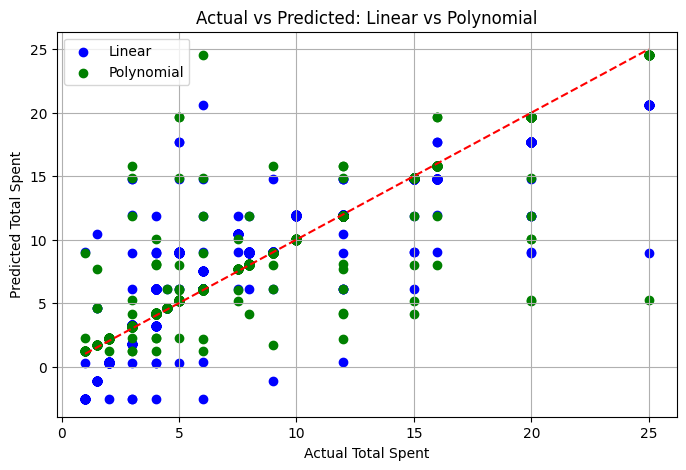

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, label='Linear', color='blue')
plt.scatter(y_test, y_poly_pred, label='Polynomial', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Total Spent")
plt.ylabel("Predicted Total Spent")
plt.title("Actual vs Predicted: Linear vs Polynomial")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Summary
- We trained and evaluated Linear Regression
- Detected model performance using R² and MSE
- Used Polynomial Regression to fine-tune
- Visualized results for deeper understanding
